# Setup

In [105]:
import numpy as np
import pandas as pd

In [106]:
framingham_train = pd.read_csv("framingham_train.csv")
framingham_train.info()
framingham_train.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,41,Some high school,1,43,0,0,1,0,306,199.0,106.0,38.75,100,75,0
1,0,38,High school/GED,1,15,0,0,0,0,176,110.0,80.0,24.03,100,113,0
2,1,42,High school/GED,1,9,0,0,0,0,205,110.0,73.0,22.40,61,66,0
3,0,42,High school/GED,0,0,0,0,1,0,263,150.0,88.0,23.68,96,78,0
4,0,53,High school/GED,0,0,0,0,1,0,272,146.0,89.0,25.50,73,67,0
5,1,41,Some high school,1,20,0,0,0,0,192,122.0,82.0,25.03,83,66,0
6,1,56,Some college/vocational school,0,0,0,0,0,0,205,129.0,83.5,28.82,56,64,0
7,0,61,College,0,0,0,0,0,0,233,126.0,73.0,23.16,74,62,0


In [107]:
framingham_test = pd.read_csv("framingham_test.csv")
framingham_test.info()
framingham_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1098 non-null   int64  
 1   age              1098 non-null   int64  
 2   education        1098 non-null   object 
 3   currentSmoker    1098 non-null   int64  
 4   cigsPerDay       1098 non-null   int64  
 5   BPMeds           1098 non-null   int64  
 6   prevalentStroke  1098 non-null   int64  
 7   prevalentHyp     1098 non-null   int64  
 8   diabetes         1098 non-null   int64  
 9   totChol          1098 non-null   int64  
 10  sysBP            1098 non-null   float64
 11  diaBP            1098 non-null   float64
 12  BMI              1098 non-null   float64
 13  heartRate        1098 non-null   int64  
 14  glucose          1098 non-null   int64  
 15  TenYearCHD       1098 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 137.4+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,46,Some high school,1,20,0,0,0,0,219,118.0,79.0,24.17,70,90,0
1,0,65,Some college/vocational school,0,0,0,0,1,0,216,163.0,102.0,30.12,91,73,0
2,0,41,College,0,0,0,0,0,0,159,119.0,76.0,27.49,55,70,0
3,0,39,Some high school,0,0,0,0,0,0,229,125.0,80.0,24.10,75,58,0
4,0,51,Some high school,0,0,0,0,1,0,225,155.0,92.5,23.84,72,63,0


In [108]:
default_healthy = np.sum(framingham_train['TenYearCHD'] == 0)
default_unhealthy = np.sum(framingham_train['TenYearCHD'] == 1)
print(pd.Series({'0': default_healthy, '1': default_unhealthy}))

0    2178
1     382
dtype: int64


In [109]:
baseline_performance = default_healthy/(default_healthy + default_unhealthy)
print(baseline_performance)

0.85078125


In [110]:
import statsmodels.formula.api as smf
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                   data = framingham_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                  0.1331
Time:                        16:07:57   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

In [111]:
from sklearn.metrics import confusion_matrix

y_test1 = framingham_test['TenYearCHD']
y_prob1 = logreg.predict(framingham_test)
y_pred1 = pd.Series([1 if x > 0.126 else 0 for x in y_prob1], index=y_prob1.index)

cm1 = confusion_matrix(y_test1, y_pred1)
print ("Confusion Matrix new : \n", cm1) 

accuracy_new = (cm1[0][0]+cm1[1][1])/np.sum(cm)
print(accuracy_new)
FPRnew = cm1[0][1]/(cm1[0][0]+cm1[0][1])
TPRnew = cm1[1][1]/(cm1[1][0]+cm1[1][1])
print(FPRnew)
print(TPRnew)

Confusion Matrix new : 
 [[569 354]
 [ 56 119]]
0.6265938069216758
0.38353196099674974
0.68


In [112]:
#expected cost
#1 assuming that treatment decision does not affect the patients' CHD outcomes:
ECOST1 = (1/1098)*(56*700000 + 354*75000 + 119*775000)
print(ECOST1)
#2 assuming that treatment decision does affect the patients' CHD outcomes:
ECOST2 = (1/1098)*(56*700000 + 354*75000 + 119*0.85*75000 + 119*775000*0.15)
print(ECOST2)

143875.2276867031
79389.79963570127


a v) Based on the calculation above, we know that the expected cost per person is about $143875.2 with the assumption that treatment decision does not affect the patients' CHD outcomes. This assumption is not fully reasonable since the medication can actually lower the possibility of people having CHD. Without considering this fact, we will fail at considering the positive effect of taking this medication and taking medication will purely be a type of consumption for each individual. As a result, if we assume that our medication can reduce the probability of participants having CHD by a coefficient of 0.15, the expected cost per person would be decreased to 79389.8.

In [113]:
#baseline model performace
healthy = np.sum(framingham_test['TenYearCHD'] == 0)
unhealthy = np.sum(framingham_test['TenYearCHD'] == 1)
print(pd.Series({'0': healthy, '1': unhealthy}))

baseline_test_accuracy = healthy/(healthy + unhealthy)
print(baseline_test_accuracy)
FPR = 0/(0+923)
TPR = 0/(0+175)
print(FPR)
print(TPR)
ecost = (175*700000)/(1098)
print(ecost)

0    923
1    175
dtype: int64
0.8406193078324226
0.0
0.0
111566.48451730418


In [114]:
new_row = {'male':0, 'age':45, 'education':'College', 'currentSmoker':1, 'cigsPerDay':9, 'BPMeds': 1,
          'prevalentStroke':1, 'prevalentHyp':0, 'diabetes':1,'totChol':220, 'sysBP':140, 'diaBP':100,'BMI':33, 'heartRate':69,'glucose':74}
y_prob_test = logreg.predict(new_row)
print(y_prob_test)
ypred = pd.Series([1 if x > 0.126 else 0 for x in y_prob_test], index=y_prob_test.index)
print(ypred)

0    0.137213
dtype: float64
0    1
dtype: int64


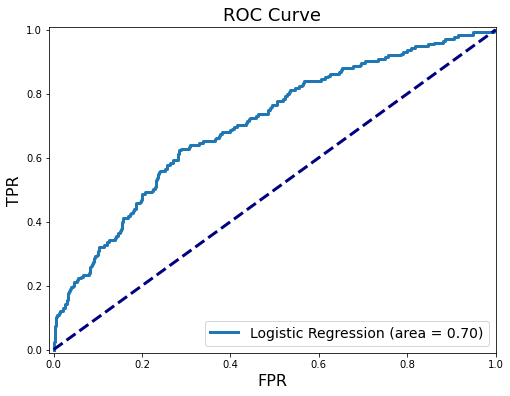

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test1, y_prob1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()